In [1]:
#Importing Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
#Reading the data set

dff=pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
dff

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


### step1 - Problem and Data Identification

In [4]:
dff.shape

(13320, 9)

In [5]:
dff.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
#so it has 13320 rows and 9 column

In [7]:
# Now lets check how much numerical  column inside the data set

In [8]:
numc=dff.select_dtypes(np.number).columns

In [9]:
numc

Index(['bath', 'balcony', 'price'], dtype='object')

In [10]:
numc.shape

(3,)

In [11]:
#Next i just assuming 'area type','balcony','society','availability', is not important to the dataset
#you can either drop or keep . u can either check the correlation and drop it. for making it minimal i just droping it 

In [12]:
dff = dff.drop(['area_type','society','balcony','availability'],axis=1)
dff.shape

(13320, 5)

In [13]:
dff

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


### step2 - EDA,Feature Engineering and Feature Selection 

In [14]:
# checking columns has null or not

In [15]:
dff.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [16]:
dff['bath'].median()

2.0

In [17]:
# so in here we can see that location has null count 1, size has a null count of 16 and bath has a null count 73

**Now i am going to handle this null value using Center Tendency Method**

In [18]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [19]:
dfz=dff['size']
dff.drop(['size'],axis=1,inplace=True)

**reason i store size in column, cuz its value is combination of number and object 
so if i use mode in size the empty space is filled with whitefield value ,it leads to error 
in converting size to int format that y i spearate store it . and i i will slice number from it
.then i convert to int**

In [20]:
# in here we fill mode of column if datatype of the column is object
#if dtype of column is numerical  fill it with median

In [21]:
for i in dff:
    if (dff[i].dtypes=='object'):
        dff.fillna(dff[i].mode()[0],inplace=True)
    else:
        dff.fillna(dff[i].median(),inplace=True)

In [22]:
dff.isnull().sum()

location      0
total_sqft    0
bath          0
price         0
dtype: int64

In [23]:
dfz.mode() [0]

'2 BHK'

In [24]:
dfz.fillna('2 BHK',inplace=True)

In [25]:
dfz.isnull().sum()

0

**When we check size column we can see that some of it name as bhk 
while some of it name as bedroom. eventhough 4 bhk and 4 bedroom is both are same 
, so to avoiding this problem i creating new column called bhk.
in that column i just give number only. ie if the number is 2 it means bhk
. for that i want to slice number from size column by using python split 
function**

In [26]:
dff['bhk'] = dfz.apply(lambda x: int(x.split(' ')[0]))

In [27]:
dff

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [28]:
dff['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [29]:
# now lets check is there any place where bedroom more than 20

In [30]:
dff[dff['bhk']>20]

,location,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


**while anlaysing this data you can see that there is 43 bedroom houses are there
but when we look to total sqft we can understand that.it is a mistake in sqft now we want to fix it**

In [31]:
dff['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

**in here we can see some of the values are not in float type ,
they are return in range format. this is the main part of EDA, ie 
most of the time data are not given clear way, and we want to clean and fix it**

#for that i frist checking which all are the data are not float type

In [32]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [33]:
# printing the number that return true in float 
dff[dff['total_sqft'].apply(is_float)]

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [34]:
# printing the values that are not float in the column.
# for that code is same just put an indicator operation in front of column acces

dff[~dff['total_sqft'].apply(is_float)]

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
56,Devanahalli,3010 - 3410,Whitefield,192.000,4
81,Hennur Road,2957 - 3450,Whitefield,224.500,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
...,...,...,...,...,...
12990,Talaghattapura,1804 - 2273,3.0,122.000,3
13059,Harlur,1200 - 1470,2.0,72.760,2
13240,Devanahalli,1020 - 1130,Whitefield,52.570,1
13265,Hoodi,1133 - 1384,2.0,59.135,2


In [35]:
# so the above are the range of value that not belong to float presnt in total sqr column

**but i checking it i see that whitfield value is enter too bath and for avoiding it
i using median of bath ie 2 replace with whitefield**

In [36]:
dff.loc[(dff['bath'])== 'Whitefield'] =2

In [37]:
dff['bath']

0        2.0
1        5.0
2        2.0
3        3.0
4        2.0
        ... 
13315    4.0
13316    5.0
13317    2.0
13318    4.0
13319    1.0
Name: bath, Length: 13320, dtype: object

In [38]:
dff[~dff['total_sqft'].apply(is_float)].head(30)

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [39]:
v=dff[~dff['total_sqft'].apply(is_float)].index

In [40]:
v


Int64Index([   30,   122,   137,   165,   188,   410,   549,   648,   661,
              672,
            ...
            12544, 12560, 12652, 12791, 12955, 12975, 12990, 13059, 13265,
            13299],
           dtype='int64', length=190)

In [41]:
dff.drop(v,axis=0,inplace=True)

**in the above step i drop the column that not belong in float type, i drop the 
value that come in range and in meter type**

In [42]:
#if u want to use it ,u can convert the range into float value by atking it average use this code to convert it
# def window(x):
#     tokens = x.split('-')
#     if len(tokens) == 2:
#         return (float(tokens[0])+float(tokens[1]))/2
#     try:
#         return float(x)
#     except:
#         return None 

**The above function is using to procees range into floating value
for example take range of 2100 - 2850 as x value. in first we split range besed on '-'
. then we store it j . and then we check j has 2 values, ie when we split range
we get two values in here its 2100 and 2850. if it is true then we take its average
and convert it into float value . if there single value ,ie not in type of range 
inside try we also coverting it in also float. but only demerit in here is
we cant convert 34.46Sq. Meter like numbers into float . for that we need 
another mathematic equtation for converting to squrt**

In [43]:
dff

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [44]:
dff['total_sqft'].dtype

dtype('O')

In [45]:
dff['total_sqft'] = dff['total_sqft'].astype(float)

In [46]:
dff['total_sqft'].dtype

dtype('float64')

In [47]:
dff['price'].dtype

dtype('float64')

In [48]:
#next i creating a newfeature called price_per_sqft
#it is a value of price *lakh/total sqr feet
#i put lakh cuz we printing our price in form of lakh
#for doing this i want to change total sqrft dataype from 'o' to float ,and that i was written in above line

dff['price_per_sqft'] =dff['price']*100000/dff['total_sqft']

In [49]:
dff

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


**Handling the location column**

In [50]:
dff.location.nunique()

1299

In [51]:
# see in here we can see that total 1299 location has availble in data set, it is a huge number
# i am going to minimlize it based on the value count or datapoint available in location

#### Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [52]:

location_count = dff['location'].value_counts(ascending=False)
location_count

Whitefield                        518
Sarjapur  Road                    386
Electronic City                   302
Kanakpura Road                    260
Thanisandra                       222
                                 ... 
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Kannur                              1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1299, dtype: int64

**in here you can see that there are more location in the column which has only one datapoint**
**now i am only taking the location which has value_count more than 10**

In [53]:
#lets check how many location in column has more than 10 count
len(location_count[location_count>10])

240

In [54]:
# there are 240 location in the column which has more than 10 valuecount or dataa point

In [55]:
#now lets check how manyy loaction has minimum 10 count

len(location_count>10)

1299

In [56]:
#there are 1299 rows in column are count less than 10, so in here i only taking rows which has location countb more than 10

#### Dimensionality Reduction

**Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns**

In [57]:
#firstly i storing location count less than 10 into a variable
location_count_less_than_10 = location_count[location_count<=10]

In [58]:
location_count_less_than_10

Nagappa Reddy Layout              10
BTM 1st Stage                     10
ITPL                              10
Kalkere                           10
Ganga Nagar                       10
                                  ..
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Kannur                             1
singapura paradise                 1
Abshot Layout                      1
Name: location, Length: 1059, dtype: int64

**next step i using lambda funcction, ie i accesing entire location column.if any row
of the column value is presnt  location_count_less_than_10 variable then i store that as other,
while rest of them that do not match with that variable store in the location**

In [59]:
dff.location = dff.location.apply(lambda x: 'other' if x in location_count_less_than_10 else x)
len(dff.location.unique())

241

**main advantage of doing this is, when i want to do categorical encoding
i just simply want to handle 241 values only**

In [60]:
dff['location'].value_counts()

other                 2891
Whitefield             518
Sarjapur  Road         386
Electronic City        302
Kanakpura Road         260
                      ... 
Pattandur Agrahara      11
Banjara Layout          11
Tindlu                  11
Kodigehalli             11
Nehru Nagar             11
Name: location, Length: 241, dtype: int64

#### Outlier Removal Using Business Logic

**As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft**

In [61]:
dff[dff.total_sqft/dff.bhk<300].head(10)

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
56,2,2.0,2,2.0,2,100000.000000
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,other,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000
78,Kaval Byrasandra,460.0,1.0,22.0,2,4782.608696
81,2,2.0,2,2.0,2,100000.000000
89,Rajaji Nagar,710.0,6.0,160.0,6,22535.211268
119,Hennur Road,276.0,3.0,23.0,2,8333.333333


**Check above data points. We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely**

In [62]:
#now iam going to remove this type unlogical column value
#you can use two method either collect all index store in variable and drop it
# else use indicator operation

In [63]:
dff.shape

(13130, 6)

In [64]:
# iam here using indicator operations
data=dff[~(dff.total_sqft/dff.bhk<300)]

In [65]:
data

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,other,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [66]:
#now we removed unlogical rows, u can see by looking shape diffrence

In [67]:
data.shape

(12313, 6)

In [68]:
#Next  we are going check whether outlayer is in price_per_sqft column , if so we handle it

In [69]:
data['price_per_sqft'].describe()

count     12313.000000
mean       6323.326489
std        4187.049729
min         267.829813
25%        4208.754209
50%        5300.000000
75%        6938.775510
max      176470.588235
Name: price_per_sqft, dtype: float64

**while taking describe we can see the min and maximum value in that column.**
**while looking that  we can see that minmum price_per_sqft is 267 in banglore, and
similarly the maximum price of its also seems to be very unlikely, so here i am going
to fix this issue by removing outlayer using standard deviation and mean**

**Outlier Removal Using Standard Deviation and Mean**

**For doing that i writing a function. in that  send dataframe as input.
after that  create  dataframe with empty space so that  concatintate values wthout outlayer.
in first  groupby main dataframe with location and store that in 'j'. next  
take each values mean and std and check wheter it satisfying the equation , and satisfying
value are store in df. if a dataset has normal distribution then around 68% datapoint
lies b/w mean and std based upon this rule i write this equation,and those who satisfying
 this rule are stored in df. after that it will concatinte and  pass the main data frame
and store it in new variable data1**

In [70]:
def remove_pricepersq_outlayer(x):
    dfs = pd.DataFrame()
    for key, j in x.groupby('location'):
        mean = np.mean(j.price_per_sqft)
        std = np.std(j.price_per_sqft)
        df = j[(j.price_per_sqft>(mean-std)) & (j.price_per_sqft<=(mean+std))]
        dfs = pd.concat([dfs,df],ignore_index=True)
        
    return dfs
data1 = remove_pricepersq_outlayer(data)
data1.shape

(10151, 6)

In [71]:
data1

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Devarachikkanahalli,1250.0,2.0,44.00,3,3520.000000
1,Devarachikkanahalli,1250.0,2.0,40.00,2,3200.000000
2,Devarachikkanahalli,1200.0,2.0,83.00,2,6916.666667
3,Devarachikkanahalli,1170.0,2.0,40.00,2,3418.803419
4,Devarachikkanahalli,1425.0,2.0,65.00,3,4561.403509
...,...,...,...,...,...,...
10146,other,1353.0,2.0,110.00,2,8130.081301
10147,other,812.0,1.0,26.00,1,3201.970443
10148,other,1440.0,2.0,63.93,3,4439.583333
10149,other,1075.0,2.0,48.00,2,4465.116279


**while i looking bhk column i can see that some of the 2 bhk has higher price than 3 bhk 
,may be it may happen because of the locality or other factor.either you can put it there without
changing .for me i considering that diffrence as outlayer and trying to handle it**

In [72]:
#Let's check if for a given how does the 2 BHK and 3 BHK property prices look like
# for that i using scatter plot 

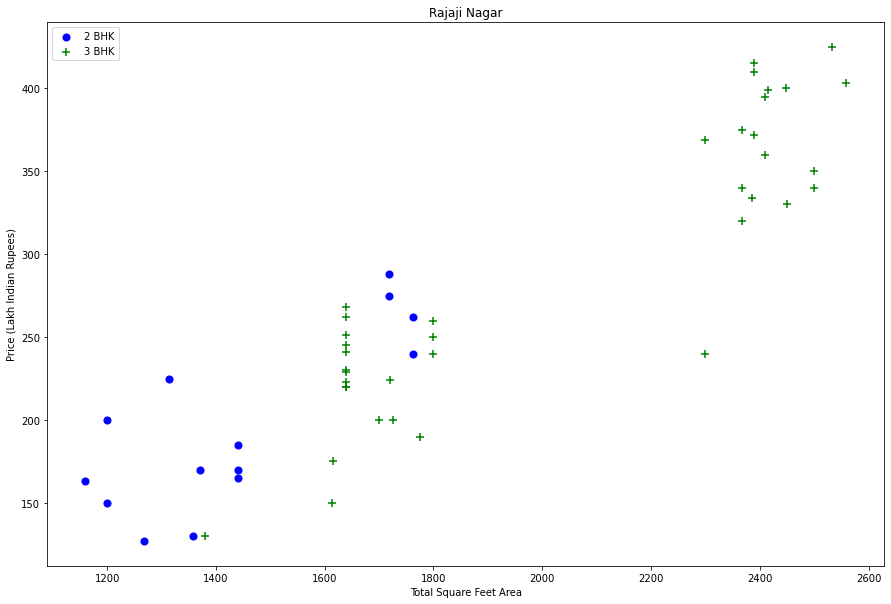

In [73]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(data1,"Rajaji Nagar")

In [74]:
#in above code i pass dataframe and location as input to take scatterplot based on bhk
#in above scatter plot you can see that some of the 2bhk property(blue) has price more than 3bhk (green)
#Now i am going to handle this outlayer

**We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e. for example :-

{

    
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}


Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment ie we covert bhk into dictionary , and if any case bigger bhk has less mean and std value than lower bhk then we will remove it **

In [75]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
dff = remove_bhk_outliers(data1)



In [76]:
dff.shape

(7217, 6)

**in above code i write a function to remove outlayer based upon the rule i mention above that code 
. in that function i pass dataframe as input ,first i doing groupby the dataframe based on 
the location . and it stored in location_df. Then i create an empty dictionary as bhk_stats.
then i groupby location_df based on bhk and it stored in bhk_df.then i put bhk inside bhk_stats
for storing value of mean ,std and count as dictionary format. Then i write another for Loop 
inside that i exclude bhk who's  mean value is less than lower bhk**

In [77]:
# after doing this now we can recheck the scatter plot by calling function too look how it look like 

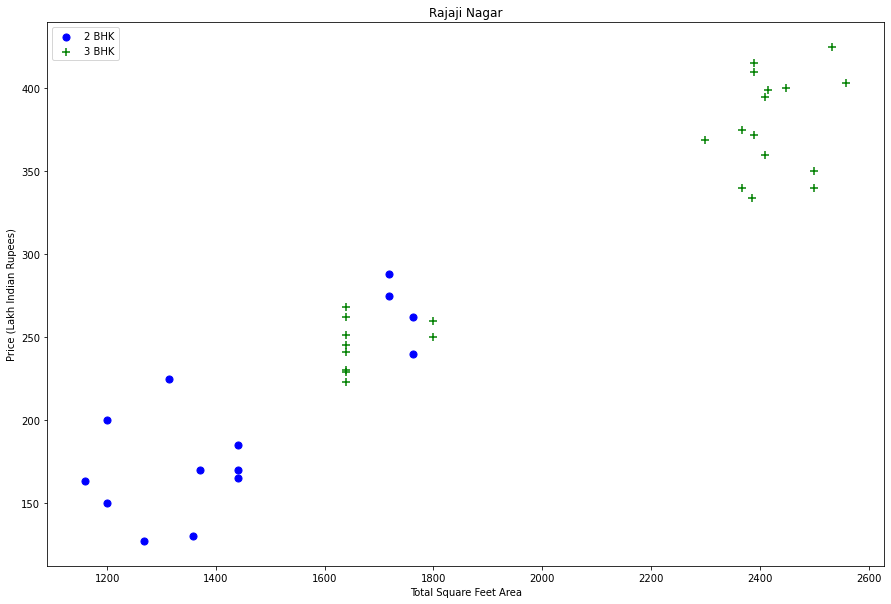

In [78]:
plot_scatter_chart(dff,"Rajaji Nagar")

In [79]:
#when u analyse two plot u can see that some 3bhk value that lies below 2 bhk are get excluded

In [80]:
# from dff.shape also we understand that our row count is decreased after excluding it 

**Plotting Histogram**

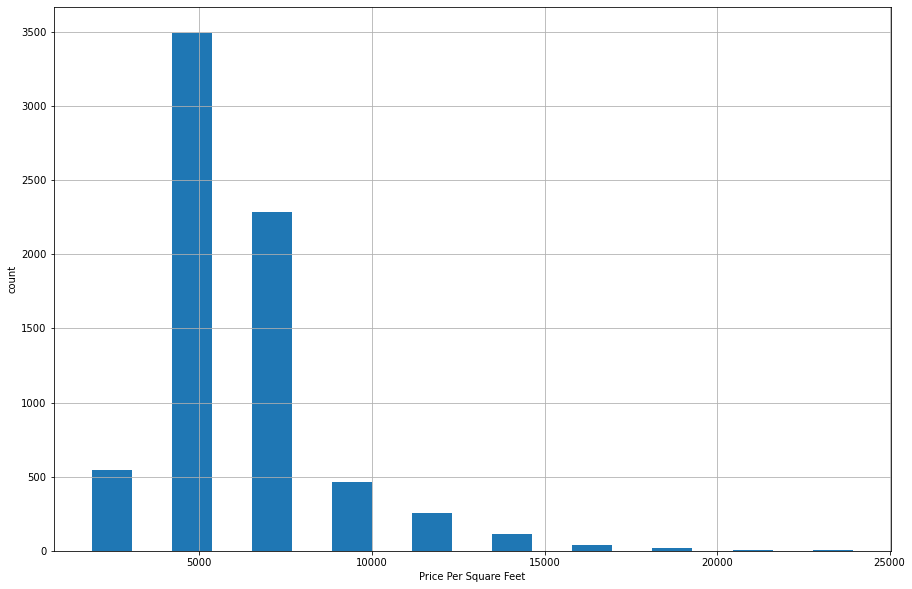

In [81]:
plt.hist(dff['price_per_sqft'],rwidth=0.5)
plt.xlabel("Price Per Square Feet")
plt.ylabel("count")
plt.grid()

In [82]:
# next i plotting bath column

In [83]:
dff['bath'].unique()

array([2.0, 3.0, 4.0, 5.0, 8.0, 1.0, 6.0, 7.0, 9.0, 12.0, 16.0, 13.0],
      dtype=object)

In [84]:
#while i looking this i see the bathroom count in more than 10 , so lets check how much room in that property has

In [85]:
dff[dff['bath']>10]

,location,total_sqft,bath,price,bhk,price_per_sqft
5211,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8382,other,12000.0,12.0,525.0,10,4375.000000
8471,other,10000.0,16.0,550.0,16,5500.000000
9212,other,6000.0,12.0,150.0,11,2500.000000
9543,other,5425.0,13.0,275.0,13,5069.124424


**16 bhk has 16 bath ok its fine, but look at 10 bhk it has 12 bathroom. in this case ask ur client
about this perspective of property is ok. in case 10 bhk 11 bath also no problm .
but in here it is 12 so i using a rule, ir if bhk count + 2 is the count of bathroom then 
we consider it has an outlayer and we handle it**

In [86]:
dff[dff['bath']>dff['bhk']+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
1622,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5172,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6628,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8306,other,11338.0,9.0,1000.0,6,8819.897689


In [87]:
#so while checking with that rule we had find 4 column in which bath is greath than bhk + 2

In [88]:
#so now i am going to drop this row , for that i want to take it index
x=dff[dff['bath']>dff['bhk']+2].index

In [89]:
x

Int64Index([1622, 5172, 6628, 8306], dtype='int64')

In [90]:
dff.shape

(7217, 6)

In [91]:
dff.drop(x,axis=0,inplace=True)

In [92]:
dff.shape

(7213, 6)

In [93]:
#now we succesfully droped it

**now i going to drop price_persqft column, cuz i take that for outlayer detction only,
now before starting training the model i want to remove unneccsary column**

In [94]:
dff

,location,total_sqft,bath,price,bhk,price_per_sqft
1,Devarachikkanahalli,1250.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,1200.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,1170.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,1425.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,947.0,2.0,43.0,2,4540.654699
...,...,...,...,...,...,...
10142,other,1200.0,2.0,70.0,2,5833.333333
10143,other,1800.0,1.0,200.0,1,11111.111111
10146,other,1353.0,2.0,110.0,2,8130.081301
10147,other,812.0,1.0,26.0,1,3201.970443


In [95]:
dff.drop(['price_per_sqft'],axis=1,inplace=True)

In [96]:
dff.head()

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2


In [97]:
#before training the model we want to convert categorical column location to numerical
# for that i using one hot encoding


**onehot encoding**

In [98]:
dummies=pd.get_dummies(dff['location'])

In [99]:
dummies.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
#in one hot encoding we know that from nearby column base we can asume what other column value
# so in one hot enocoding we can eitherv drop first or last column
#since in here last column is other i drop that
#after that i concat with dff and dummies into another dataframe

In [101]:
data = pd.concat([dff,dummies.drop(['other','Whitefield'],axis=1)],axis='columns')
#in here we concatinating column wise
#while i see location 1 missing value in the location is filled with whitefield, so i drop that 

In [102]:
data.head()

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
#since we convert loaction column into numerical ,we dont need location column anymore so now lets drop that 

In [104]:
data.drop(['location'],axis=1,inplace=True)

In [105]:
data.head()

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,43.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**step3 - Model selection and training**

**Step 3.1 spliting x and y for train test split method**

In [106]:
#x stores independ column , so we want to drop price(dependent column) from it

In [107]:
x=data.drop(['price'],axis=1)

In [108]:
x.head()

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
y=data['price']

In [110]:
y

1         40.0
2         83.0
3         40.0
4         65.0
5         43.0
         ...  
10142     70.0
10143    200.0
10146    110.0
10147     26.0
10150    400.0
Name: price, Length: 7213, dtype: float64

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [112]:
#in here i give 70% rows to train and 30 % row to test

**step3.2 importing Linear Regression**

In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
lr=LinearRegression()

In [115]:
lr.fit(X_train,y_train,)

LinearRegression()

In [116]:
lr.score(X_test,y_test)

0.799436522468376

In [117]:
# so in here we get accuracy around 80%, its good 

**Use K Fold cross validation to measure accuracy of our LinearRegression model**

In [118]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.78272681, 0.80642523, 0.87005573, 0.82235912, 0.76424378])

In [119]:
#in above line we split x,y in diffrent way, may it cut from top 30% , or it split from bottom, or from midlle or randomly picking .
#after splitited value we check for cross validation and it provide us score 
#since it split in 5 way we get 5 score value, if you give 4 we get 4 score 

**We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose**

**Find best model using GridSearchCV**

In [120]:

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
               
            }
        },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'],config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            
        })

    return pd.DataFrame(scores,columns=['model','best_score'])

find_best_model_using_gridsearchcv(x,y)

,model,best_score
0,linear_regression,0.809162
1,lasso,0.672317
2,decision_tree,0.644152


**while analysing the scores that get from GridSearchCV we can say that linear regression is
the best algorithm for the model training, you can also check diffrent prediction
algorithm with LinearRegression , in here i use lasso and decision tree for 
comparing**

**Based on above results we can say that LinearRegression gives the best score. 
     Hence we will use that.**

In [121]:
data.columns

Index(['total_sqft', 'bath', 'price', 'bhk', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout',
       ...
       'Vidyaranyapura', 'Vijayanagar', 'Vishveshwarya Layout',
       'Vishwapriya Layout', 'Vittasandra', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=242)

**We know that Linear Regression is working by finding best fit line in backend 
.ie MSE value less is consider as best fit line . its denotes as Y=MX+B**

In [122]:
#now lets check coef of best fit line (ie M)
lr.coef_

array([ 8.03981890e-02,  4.64397201e+00, -4.23298240e+00, -4.19687295e+01,
        8.79385026e+01,  7.05966967e+00, -5.70931092e+01,  1.69208374e+02,
       -6.55329800e+01, -4.24485131e+01, -1.98617921e+01, -1.51545838e+01,
       -4.62565340e+01, -4.42498328e+01, -3.45974728e+01, -5.13879071e+01,
       -4.02580791e+01, -2.60058566e+01, -2.96156369e+01, -2.97113730e+01,
       -4.23857672e+01, -4.60535220e+01, -4.14947660e+01, -4.31873254e+01,
       -3.96213536e+01, -4.33854728e+01, -3.06215522e+01, -8.42032023e+00,
        2.73186443e+01, -3.89741940e+01, -4.95965601e+01, -2.57304217e+01,
       -1.45971703e+01, -3.09080296e+01,  9.91529737e+01, -2.88422922e+01,
       -5.94535984e+01, -3.69107482e+01, -3.55452192e+01, -2.86256222e+01,
       -8.04338873e+00, -2.91223690e+01,  3.55855935e+01,  9.24791144e+00,
       -4.52622930e+01, -5.16101051e+01, -5.37336659e+01, -2.94110208e+01,
        1.24387262e+02, -4.45352221e+01, -2.90974850e+01, -1.57751728e+01,
        1.07854183e+01, -

In [123]:
#this much M, count of M is same as count of indepent column 

In [124]:
#Now lets check the intercpt point for best fit line
lr.intercept_

-1.6538990095509405

In [125]:
pv=lr.predict(X_test)

In [126]:
#Minimum Mse Value for drawing this best line

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,pv)


1663.336450134317

In [127]:
#the above is the mse value we get to draw best fit line
#pv i store predicted value by predicting x_test column

**Plotting Assumptions Check our model is performing good or bad**

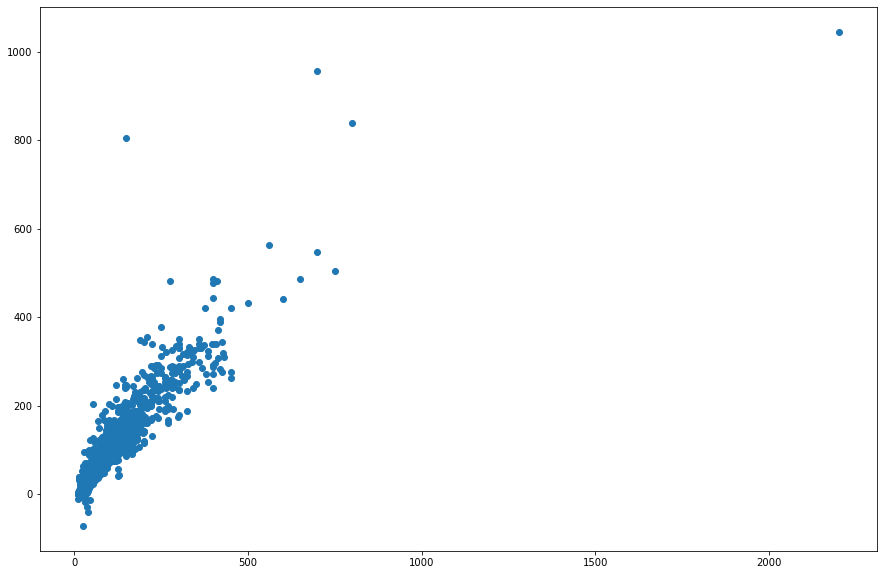

In [128]:
#plot scatter plot for prediction, if the scatter point we get is linear then we can say that our model actually perform very well
plt.scatter(y_test,pv)

In [129]:
# we got almost linear line, since best line y intercept start from -1 it look like that

In [130]:
#Next i am going to plot residuals
#Residuals means error
# ie error w.r.t y_test and prediction value
residuals=y_test-pv

In [131]:
residuals

6211     3.535552
5933     9.294547
3437     7.873771
1776    14.111622
7791   -15.770420
          ...    
5481     0.097055
5885    -4.453632
1478    -0.494738
451     21.097337
420     -9.864851
Name: price, Length: 2164, dtype: float64

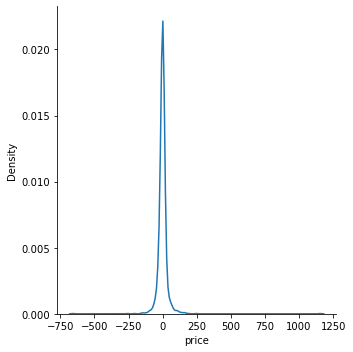

In [132]:
#ploting the residuals
import seaborn as sns
sns.displot(residuals,kind='kde')

In [133]:
#after plotting we can see that our model is almost normaly distributed, and performing very well

**R SQUARE and AdjuSTED R SQUARE**

In [134]:
#R2(R SQUARE)= 1-RSS/TSS
#ADJR2(ADJUSTED R SQUARE)=1-(1-R2)*(N-1)/(N-P-1)
#where n means number of rows ,p means number of features

In [135]:
r2square = lr.score(X_test,y_test) 

In [136]:
r2square

0.799436522468376

In [137]:
# next i cheking adjusted r2 , always rember that adjusted r2< r2

In [138]:
adj_rsqur = 1-(1-r2square)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [139]:
adj_rsqur

0.7742878241930787

In [140]:
#so in here we can see that adj_rsqur is less than r2squre value

**Test the model for few properties**

In [141]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    j = np.zeros(len(x.columns))
    j[0] = sqft
    j[1] = bath
    j[2] = bhk
    if loc_index >= 0:
        j[loc_index] = 1

    return lr.predict([j])[0]

In [142]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

86.62593893581779

**Pickle the model file for Deployment**

In [143]:
import pickle 
with open("model.pkl",'wb')as files:
    pickle.dump(lr, files)

**Export location and column information to a file that will be useful later on in our 
prediction application**

In [144]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))